In [5]:
import os
import pandas as pd
from random import randrange

## Randomly generating results for testing

In [ ]:
os.chdir('C:\\Users\\jowan\\Downloads')
!mkdir exp_plaus_responses
!mkdir val_arous_responses

In [ ]:
# Randomly generating responses; you won't need this cell
def randRes(keyword, rootpath, outpath):
    files = [[f for f in files if keyword in f] for root, dirs, files in os.walk(rootpath)][0]
    
    for f in files:
        df=pd.read_excel(f)
        rows = randrange(6,10)
        for r in range(rows):
            df.loc[len(df)] = [randrange(1,8) for i in range(len(df.columns))]
        df.to_excel(outpath+f[0:9]+' test.xlsx', index=False)
        print(f[0:9]+' saved in '+outpath)

randRes('預期', '.', 'C:\\Users\\jowan\\Downloads\\exp_plaus_responses\\')
randRes('情緒', '.', 'C:\\Users\\jowan\\Downloads\\val_arous_responses\\')
    
os.chdir('C:\\Users\\jowan\\Downloads\\2nd_round')

## Compiling Expectancy & Plausibility responses (2nd round sentences)

Rating results (individual dimension) saved as "2nd_exp_res.xlsx" in /home/amandalin047/2nd_round/2nd_exp_plaus 

Rating results (individual dimension) saved as "2nd_plaus_res.xlsx" in /home/amandalin047/2nd_round/2nd_exp_plaus 

Combined results saved as "2nd_combined.xlsx" in /home/amandalin047/2nd_round/2nd_exp_plaus 


CORRELATION


,Exp. mean,Plaus. mean
Exp. mean,1.000000,0.936387
Plaus. mean,0.936387,1.000000




Scatter plots saved as "2nd_scatter.png" in /home/amandalin047/2nd_round/2nd_exp_plaus 



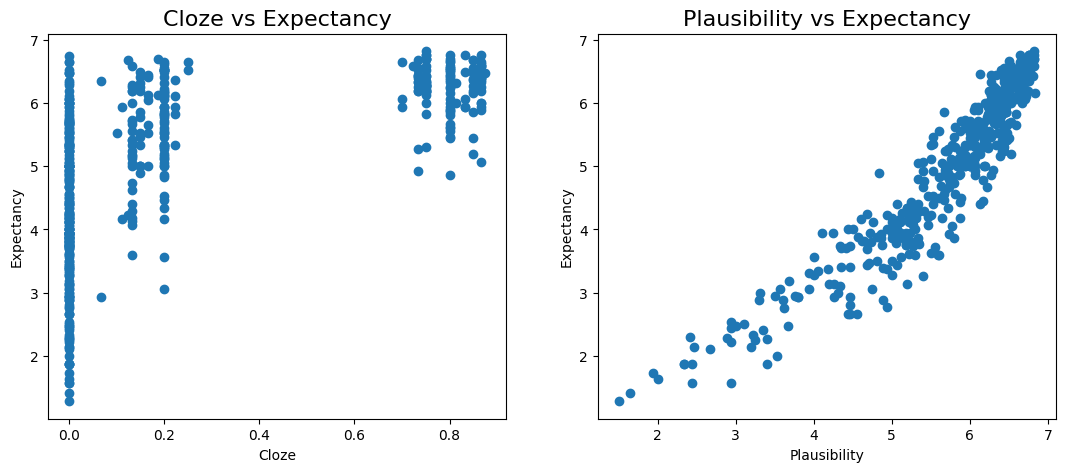

Box plots saved as "2nd_boxplot.png" in /home/amandalin047/2nd_round/2nd_exp_plaus 



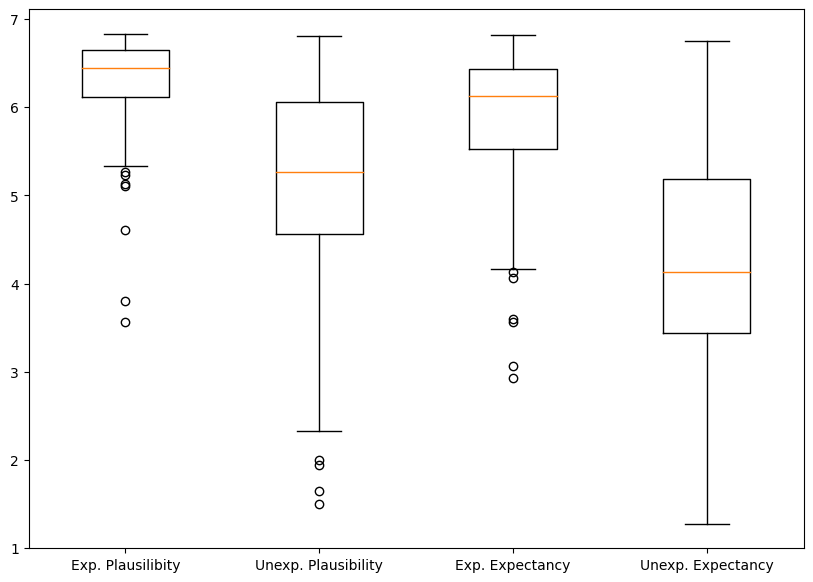


TABLE


,Exp. Sentences,Unexp. Sentences
Plausibility,6.314501,5.139729
Expectancy,5.902507,4.228403


In [3]:
# for Expectancy & Plausibility
from ratings_analysis import main

main('/home/amandalin047/2nd_round/2nd_exp_plaus',
     '2nd_exp_res.xlsx', '2nd_plaus_res.xlsx',
     '/home/amandalin047/2nd_round', '2nd_combined.xlsx',
     '2nd_scatter.png', '2nd_boxplot.png')

## Compiling Frame Valence & Arousal responses (2nd round sentences)

In [4]:
# for Frame Valence & Arousal
from ratings_analysis import CombineLists, MeanStd

combined1, combined2 = CombineLists('/home/amandalin047/2nd_round/2nd_frame_val_arous')
MeanStd(combined1, '2nd_val_res.xlsx');
MeanStd(combined2, '2nd_arous_res.xlsx');

Rating results (individual dimension) saved as "2nd_val_res.xlsx" in /home/amandalin047/2nd_round/2nd_frame_val_arous 

Rating results (individual dimension) saved as "2nd_arous_res.xlsx" in /home/amandalin047/2nd_round/2nd_frame_val_arous 



In [14]:
import numpy as np

os.chdir('/home/amandalin047/2nd_round/2nd_round_results')
combined = pd.read_excel('2nd_combined.xlsx')
val = pd.read_excel('2nd_ratings_results.xlsx', sheet_name='2nd_frame_valence')
arous = pd.read_excel('2nd_ratings_results.xlsx', sheet_name='2nd_frame_arousal')

N, combined_idx, val_arous_idx = len(combined), combined['Index'].tolist(), val['Index'].tolist()
val_mean = [val['mean'][val_arous_idx.index(combined_idx[i])] for i in range(N)]
arous_mean = [arous['mean'][val_arous_idx.index(combined_idx[i])] for i in range(N)]

combined.insert(len(combined.columns), 'Val. mean', val_mean)
combined.insert(len(combined.columns), 'Arous. mean', arous_mean)
combined.to_excel('2nd_all_means.xlsx', index=False)

## Compiling Expectancy & Plausibility responses (1st round re-rated sentences)

In ratings_analysis.py, change the follwoing lines (77 and 78) the definition of CompareExpPlaus
```
df = pd.concat((pd.read_excel('2nd_ratings_random_sort.xlsx', sheet_name='2nd_List1_plaus_exp')[['Index', 'Sentences', 'Cloze']],
                pd.read_excel('2nd_ratings_random_sort.xlsx', sheet_name='2nd_List2_plaus_exp')[['Index', 'Sentences', 'Cloze']]))
```                
to
```
df = pd.concat((pd.read_excel('1st_ratings_random_sort.xlsx', sheet_name='1st_List1_rand_sort')[['Index', 'Sentences', 'Cloze']],
                pd.read_excel('1st_ratings_random_sort.xlsx', sheet_name='1st_List2_rand_sort')[['Index', 'Sentences', 'Cloze']]))
```

In [15]:
# for Expectancy & Plausibility
from ratings_analysis import main

try: 
    main('/home/amandalin047/2nd_round/1st_exp_plaus',
         '1st_exp_res.xlsx', '1st_plaus_res.xlsx',
         '/home/amandalin047/2nd_round', '1st_combined.xlsx',
         '1st_scatter.png', '1st_boxplot.png')
    
except Exception as error:
    print(error)

ufunc 'add' did not contain a loop with signature matching types (dtype('<U24'), dtype('<U24')) -> None
